In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [2]:
df = pd.read_csv('crimedata.csv', encoding='latin-1')

In [3]:
df.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [4]:
df['countyCode'].replace('?','0', inplace = True)
df['ViolentCrimesPerPop'].replace('?','0', inplace = True)

In [5]:
df.loc[df['countyCode'] == '?']

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop


In [6]:
df.loc[df['ViolentCrimesPerPop'] == '?']

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop


In [13]:
X = df[['PctUnemployed']].astype(int).values
y = df['ViolentCrimesPerPop'].values

In [14]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
y_pred = regr.predict(X_test)

In [17]:
y_pred

array([ 838.49014999,  483.72637743,  395.03543429,  483.72637743,
        217.65354801,  395.03543429,  217.65354801,  306.34449115,
        661.10826371,  927.18109313,  395.03543429,  572.41732057,
        749.79920685,  395.03543429, 1193.25392255,  306.34449115,
        483.72637743,  395.03543429,  572.41732057,  395.03543429,
        217.65354801,  483.72637743,  749.79920685,  572.41732057,
        395.03543429,  306.34449115,  572.41732057,  572.41732057,
        572.41732057,  927.18109313,  749.79920685,  483.72637743,
        306.34449115,  306.34449115,  395.03543429,  483.72637743,
        306.34449115,  395.03543429,  749.79920685,  217.65354801,
        927.18109313,  483.72637743, 1370.63580883,  661.10826371,
        217.65354801,  306.34449115,  749.79920685,  306.34449115,
        395.03543429,  395.03543429,  661.10826371,  395.03543429,
        395.03543429,  483.72637743,  483.72637743,  395.03543429,
       1548.01769511, 2080.16335395,  572.41732057,  661.10826

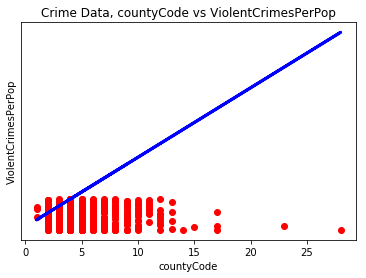

In [18]:
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.title('Crime Data, countyCode vs ViolentCrimesPerPop')
plt.xlabel('countyCode')
plt.ylabel('ViolentCrimesPerPop')

plt.yticks(())
plt.show()

In [15]:
X1 = df[['population']]

In [16]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)

In [17]:
regr.fit(X1_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
y1_pred = regr.predict(X1_test)

In [19]:
y1_pred

array([ 529.91262123,  526.18730228,  652.69454808,  508.50533998,
        513.42872941,  505.23697738,  513.67119605,  512.07322019,
        505.59464311,  509.61344545,  511.0918337 ,  509.27991668,
        510.36662804,  521.46797979,  522.30893311,  504.96982522,
        543.23676675,  550.13828903,  531.74922378,  530.2264016 ,
        514.91699187,  515.57911232,  520.13167041,  510.88557248,
        507.24966996,  507.05492865,  542.77432471,  506.51239582,
        755.58982158,  517.76679778,  506.06695936,  508.35558117,
        527.7726611 ,  505.70325939,  528.11057842,  516.91377599,
        512.49287399,  505.30883967,  537.91895759,  508.20362809,
        508.13231437,  509.31392783,  506.40542524,  509.0829811 ,
        505.35656501,  506.24304939,  504.81458074,  509.70560472,
        545.05307231,  546.74759598,  506.48112749,  506.0779307 ,
        536.98090791,  507.95512721,  505.78499589,  505.13110394,
        507.16957917,  511.56085854,  551.37091923,  505.14481

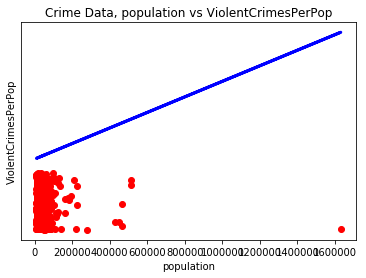

In [20]:
plt.scatter(X1_test, y_test,  color='red')
plt.plot(X1_test, y1_pred, color='blue', linewidth=3)

plt.title('Crime Data, population vs ViolentCrimesPerPop')
plt.xlabel('population')
plt.ylabel('ViolentCrimesPerPop')

plt.yticks(())

plt.show()

In [21]:
X2 = df[['racePctAsian']]

In [22]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)

In [23]:
regr.fit(X2_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
y2_pred = regr.predict(X2_test)

In [25]:
y2_pred

array([549.28433149, 526.94071084, 566.86257542, 526.94071084,
       534.8304074 , 526.5620054 , 539.95871016, 526.62512298,
       531.35894091, 529.19716405, 527.13006356, 526.30953512,
       525.80459454, 526.70401994, 527.28785749, 525.82037393,
       527.58766596, 533.88364381, 549.09497877, 531.02757366,
       528.10838593, 527.0353872 , 526.43577026, 526.104403  ,
       526.67246116, 528.67644408, 528.29773865, 529.65476646,
       528.96047316, 525.96238847, 525.85193271, 526.08862361,
       528.43975319, 526.35687329, 530.12814825, 529.22872284,
       525.91505029, 549.82083085, 527.24051931, 535.99808249,
       525.86771211, 526.67246116, 526.05706483, 527.88747443,
       526.37265269, 526.41999087, 526.29375572, 526.70401994,
       537.24465454, 535.33534798, 526.35687329, 526.87759327,
       531.75342574, 529.21294345, 525.75725636, 528.6448853 ,
       530.52263308, 559.24112854, 526.90915205, 525.4258891 ,
       528.04526836, 546.66495223, 525.94660907, 526.16

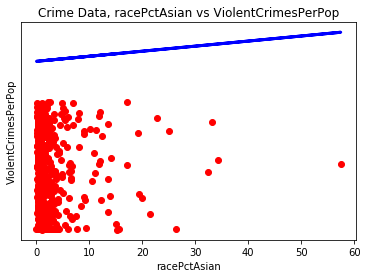

In [45]:
plt.scatter(X2_test, y_test,  color='red')
plt.plot(X2_test, y2_pred, color='blue', linewidth=3)

plt.title('Crime Data, racePctAsian vs ViolentCrimesPerPop')
plt.xlabel('racePctAsian')
plt.ylabel('ViolentCrimesPerPop')

plt.yticks(())
plt.show()

In [53]:
df['burglaries'].replace('?','0', inplace = True)

In [54]:
X3 = df[['burglaries']].astype(int)

In [55]:
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=0)

In [56]:
regr.fit(X3_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
y3_pred = regr.predict(X3_test)

In [58]:
y3_pred

array([ 560.00206844,  499.16286805,  504.33047089,  495.54021864,
        494.84765331,  488.50801684,  490.58571283,  490.90535837,
        496.39260674,  499.48251359,  493.83544245,  492.34376328,
        496.9253493 ,  498.63012549,  522.33716943,  490.58571283,
        554.62136858,  522.1240724 ,  516.7966468 ,  508.85878265,
        491.91756923,  500.4414502 ,  529.84883953,  491.43810093,
        490.85208411,  492.61013456,  506.94090943,  492.9297801 ,
        972.98410121,  517.96868043,  490.10624453,  491.06518113,
        506.67453815,  490.26606729,  522.86991199,  497.56464037,
        492.5568603 ,  490.95863262,  525.53362479,  493.62234542,
        494.47473352,  497.61791463,  500.97419276,  493.99526522,
        489.46695345,  494.84765331,  509.71117075,  494.47473352,
        496.71225227,  567.19409301,  493.72889394,  490.85208411,
        517.11629233,  495.54021864,  486.90978916,  488.5612911 ,
        496.33933248,  509.87099351,  584.56150047,  500.76109

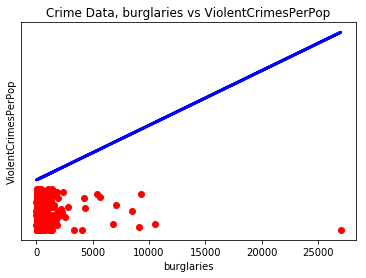

In [59]:
plt.scatter(X3_test, y_test,  color='red')
plt.plot(X3_test, y3_pred, color='blue', linewidth=3)

plt.title('Crime Data, burglaries vs ViolentCrimesPerPop')
plt.xlabel('burglaries')
plt.ylabel('ViolentCrimesPerPop')

plt.yticks(())
plt.show()